<a href="https://colab.research.google.com/github/bigbeawr/leap-asl/blob/master/models/LeapASL_Sequential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# multi-class classification with Keras
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from sklearn.pipeline import Pipeline

In [ ]:
EPOCHS = 60
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

dataframe = pandas.read_csv("filtered_pre.csv")
dataset = dataframe.values
X = dataset[:,:-1].astype(float)
Y = dataset[:,-1]

encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

dummy_y = np_utils.to_categorical(encoded_Y)

print(encoded_Y)
print(dummy_y)

# define baseline model
def baseline_model():
  # create model
  model = Sequential()
  model.add(Dense(128, input_dim=20, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(26, activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.fit(X, dummy_y, epochs=EPOCHS, batch_size=10, verbose=1, callbacks = [callback])

  return model

estimator = KerasClassifier(build_fn=baseline_model, epochs=EPOCHS, batch_size=16, verbose=1, callbacks = [callback])

kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[ 0  0  0 ... 25 25 25]
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


<ipython-input-4-68cd90a5dea2>:31: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=baseline_model, epochs=EPOCHS, batch_size=16, verbose=1, callbacks = [callback])


Epoch 1/60
2000/2000 [==============================] - 8s 3ms/step - loss: 1.0852 - accuracy: 0.7086
Epoch 2/60
2000/2000 [==============================] - 5s 2ms/step - loss: 0.5648 - accuracy: 0.8112
Epoch 3/60
2000/2000 [==============================] - 5s 3ms/step - loss: 0.4897 - accuracy: 0.8318
Epoch 4/60
2000/2000 [==============================] - 5s 2ms/step - loss: 0.4466 - accuracy: 0.8473
Epoch 5/60
2000/2000 [==============================] - 5s 3ms/step - loss: 0.4014 - accuracy: 0.8624
Epoch 6/60
2000/2000 [==============================] - 6s 3ms/step - loss: 0.3709 - accuracy: 0.8714
Epoch 7/60
2000/2000 [==============================] - 5s 2ms/step - loss: 0.3563 - accuracy: 0.8777
Epoch 8/60
2000/2000 [==============================] - 5s 2ms/step - loss: 0.3461 - accuracy: 0.8813
Epoch 9/60
2000/2000 [==============================] - 5s 2ms/step - loss: 0.3263 - accuracy: 0.8856
Epoch 10/60
2000/2000 [==============================] - 5s 3ms/step - loss: 0.320

In [ ]:
estimator.fit(X, dummy_y)

Epoch 1/60
2000/2000 [==============================] - 6s 3ms/step - loss: 1.0166 - accuracy: 0.7182
Epoch 2/60
2000/2000 [==============================] - 5s 3ms/step - loss: 0.5510 - accuracy: 0.8137
Epoch 3/60
2000/2000 [==============================] - 5s 3ms/step - loss: 0.4800 - accuracy: 0.8365
Epoch 4/60
2000/2000 [==============================] - 5s 3ms/step - loss: 0.4241 - accuracy: 0.8556
Epoch 5/60
2000/2000 [==============================] - 5s 2ms/step - loss: 0.3922 - accuracy: 0.8639
Epoch 6/60
2000/2000 [==============================] - 5s 2ms/step - loss: 0.3646 - accuracy: 0.8708
Epoch 7/60
2000/2000 [==============================] - 5s 2ms/step - loss: 0.3472 - accuracy: 0.8791
Epoch 8/60
2000/2000 [==============================] - 5s 2ms/step - loss: 0.3267 - accuracy: 0.8878
Epoch 9/60
2000/2000 [==============================] - 5s 2ms/step - loss: 0.3189 - accuracy: 0.8871
Epoch 10/60
2000/2000 [==============================] - 5s 3ms/step - loss: 0.307

In [ ]:
estimator.score(X, encoded_Y)

1250/1250 [==============================] - 3s 2ms/step - loss: 0.1420 - accuracy: 0.9461


0.9460892081260681

625/625 [==============================] - 2s 3ms/step


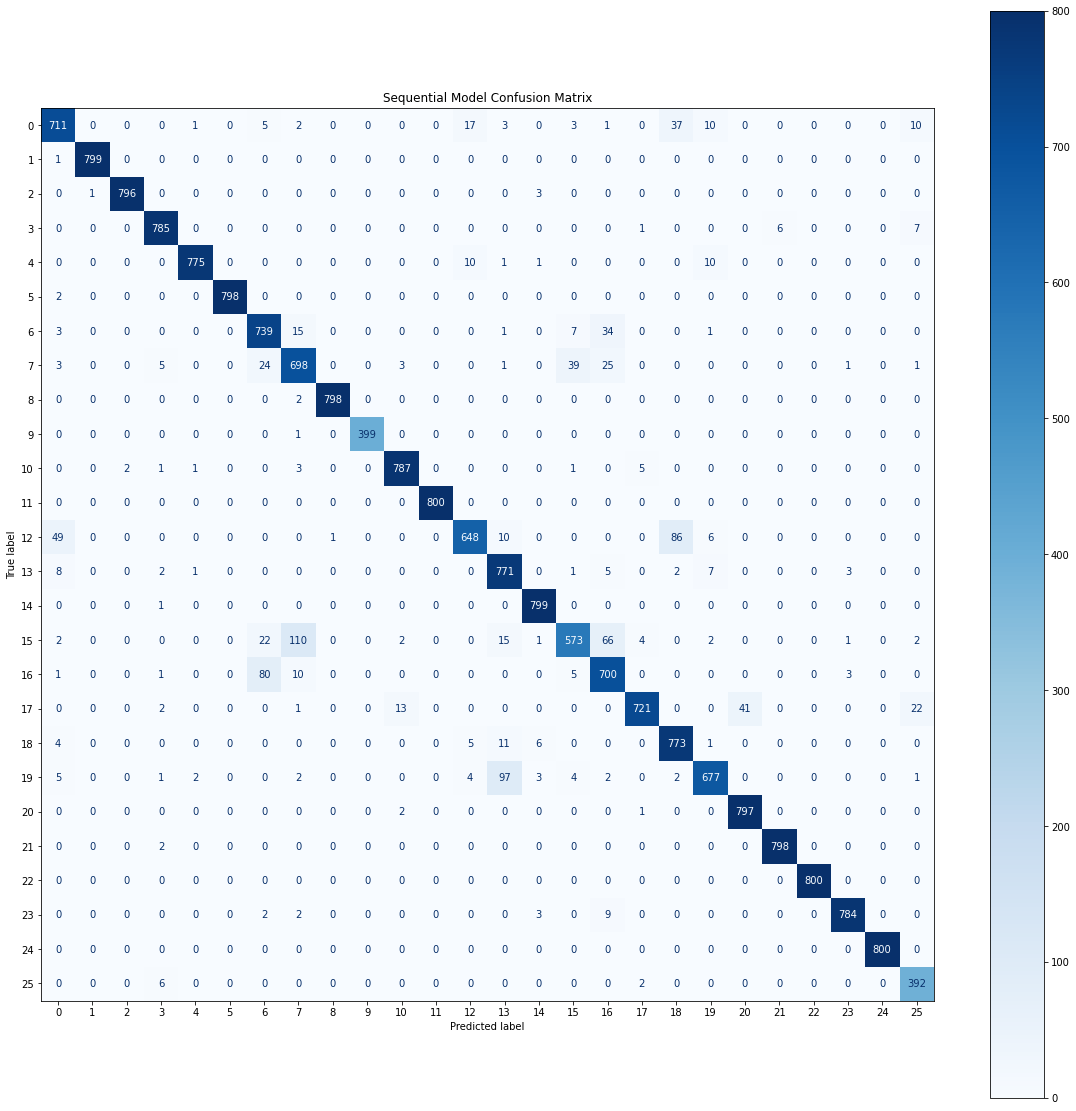

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 20))

cm = confusion_matrix(encoded_Y, estimator.predict(X))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=estimator.classes_)

disp.plot(cmap=plt.cm.Blues, ax = ax)

plt.title('Sequential Model Confusion Matrix')

plt.show()

In [ ]:
EPOCHS = 60
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

model = Sequential()
model.add(Dense(128, input_dim=20, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(26, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, dummy_y, epochs=EPOCHS, batch_size=10, verbose=1, callbacks = [callback])
# model.fit(X, dummy_y, epochs=EPOCHS, batch_size=32, verbose=1)

Epoch 1/60
 479/2000 [======>.......................] - ETA: 3s - loss: 2.2839 - accuracy: 0.5689

KeyboardInterrupt: ignored

In [ ]:
model.evaluate(X,  dummy_y)

625/625 [==============================] - 2s 2ms/step - loss: 0.2060 - accuracy: 0.9263


[0.20604677498340607, 0.9263352751731873]

In [ ]:
model.save("sequential_e{}.h5".format("40"))

AttributeError: ignored

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2688      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 26)                3354      
                                                                 
Total params: 22,554
Trainable params: 22,554
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sns
import numpy as np

def plot_classification_report(y_tru, y_prd, figsize=(10, 10), ax=None):

    plt.figure(figsize=figsize)

    xticks = ['precision', 'recall', 'f1-score', 'support']
    yticks = list(np.unique(y_tru))
    yticks += ['avg']

    rep = np.array(precision_recall_fscore_support(y_tru, y_prd)).T
    avg = np.mean(rep, axis=0)
    avg[-1] = np.sum(rep[:, -1])
    rep = np.insert(rep, rep.shape[0], avg, axis=0)

    sns.heatmap(rep,
                annot=True, 
                cbar=False, 
                xticklabels=xticks, 
                yticklabels=yticks,
                cmap=plt.cm.Blues,
                ax=ax)

625/625 [==============================] - 1s 1ms/step


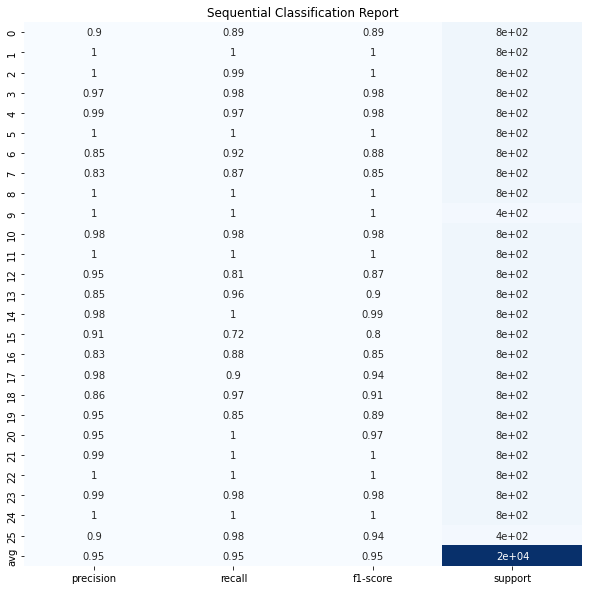

In [ ]:
plot_classification_report(encoded_Y, estimator.predict(X))
plt.title("Sequential Classification Report")

plt.show()
plt.close()